# Datasets

21st Century Weather host a series of datasets on `su28`. You can find them in the following table along with the available documentation. 

If you need to store a dataset please contact the Research Software Engineer team through Cumulus.


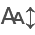

In [ ]:
import itables
import yaml
import pandas as pd
import os
from pathlib import Path
itables.init_notebook_mode()

files = list(Path("./").glob("*.md"))

# List to hold data from each file
data_list = []

for file_path in files:
    with open(file_path, 'r') as f:
        content = f.read()
    
    if content.startswith("---"):
        parts = content.split('---')
        if len(parts) > 2:
            yaml_header = parts[1]
            try:
                header_data = yaml.safe_load(yaml_header)
                header_data["filename"] = file_path.name  
                data_list.append(header_data)
            except yaml.YAMLError as e:
                print(f"YAML parse error in {file_path.name}: {e}")


df = pd.DataFrame(data_list)
df['filename'] = df['filename'].str.replace('.md', '.html', regex=False)
df["title"] =  "<a href='" + df["filename"] + "'>" + df["title"] + "</a>"
df  = df.drop("filename", axis=1)
df.columns = ['Name', 'Location on Gadi', 'Mantainer', 'Description']


In [ ]:
itables.show(df, html=False, allow_html = True, columnDefs=[{"className": "dt-left", "targets": "_all"}])